## Simple Linear Regresion

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import pylab as pd
"""
`pylab` is a module that includes `matplotlib.pyplot`, `numpy`, `numpy.fft`,
`numpy.linalg`, `numpy.random`, and some additional functions, all within
a single namespace. Its original purpose was to mimic a MATLAB-like way
of working by importing all functions into the global namespace. This is
considered bad style nowadays.
"""
import numpy as np
%matplotlib inline

### Downloading Data
From IBM Object Storage.

In [2]:
# check either terminar is CMD or PowerShell
!(dir 2>&1 *`|echo CMD);&<# rem #>echo PowerShell
!mkdir datasets 2>NUL

# Check if datasets file exist - on CMD # Need wget installed on system.
!if not exist "datasets/FuelConsumption.csv" (wget -O datasets/FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv) else (echo "File already downloaded")
#

CMD
"File already downloaded"


In [3]:
# df = pd.read_csv(r"D:\_Jaime\02 UPTP\_CLASES\05 QUINTO SEMESTRE\07 CAPSOTNE\07 Code\MJCapstone\08 Courses\Machine Learning\datasets\FuelConsumption.csv")
df = pd.read_csv(r"datasets\FuelConsumption.csv")

### Data Exploration

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Splititng data (raw way)
At this first model, I did not split into train and test to check and understand how 1 and 2 dimension array works.

In [7]:
# # Comparison between two datatypes
# Pandas DataFrame
X = pd.DataFrame(df['ENGINESIZE'])
y = pd.DataFrame(df['CO2EMISSIONS'])

# Numpy array
X_serie = np.array(df['ENGINESIZE'])
y_serie = np.array(df['CO2EMISSIONS'])


In [8]:
print(type(df))
print(type(X))
print(type(y))
print(type(X_serie))
print(type(y_serie))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Another way to split data


In [9]:
mask = np.random.rand(len(df)) < 0.8
mask

array([False,  True,  True, ...,  True,  True,  True])

In [10]:
train = df[mask]
train


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [11]:
test = df[~mask]
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
12,2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
19,2014,AUDI,A4,COMPACT,2.0,4,AV8,Z,9.9,7.4,8.8,32,202
22,2014,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,2014,VOLKSWAGEN,PASSAT,MID-SIZE,3.6,6,A6,Z,12.4,8.8,10.8,26,248
1053,2014,VOLKSWAGEN,TIGUAN 4MOTION,SUV - SMALL,2.0,4,A6,Z,11.7,9.4,10.7,26,246
1058,2014,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264


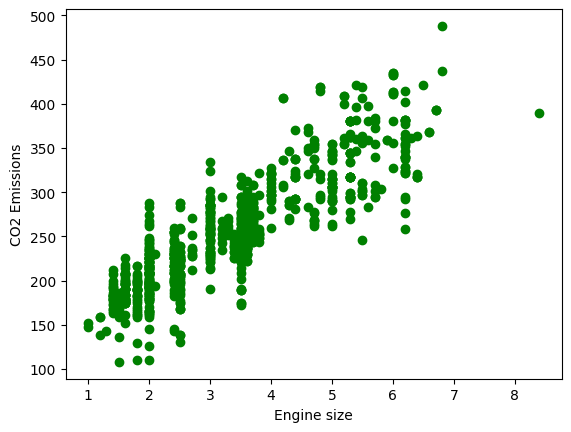

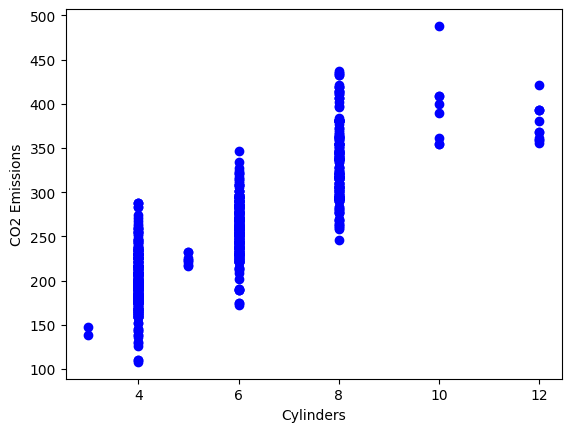

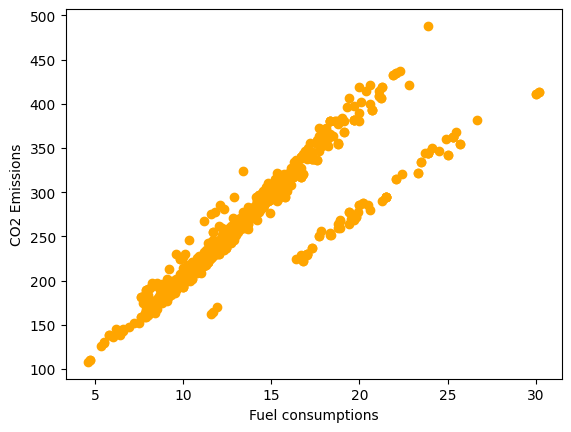

In [12]:
plt.figure()
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine size")
plt.scatter(np.array(train.ENGINESIZE), np.array(train.CO2EMISSIONS), color='green')

plt.figure()
plt.ylabel("CO2 Emissions")
plt.xlabel("Cylinders")
plt.scatter(np.array(train.CYLINDERS), np.array(train.CO2EMISSIONS), color='blue')
plt.figure()
plt.ylabel("CO2 Emissions")
plt.xlabel("Fuel consumptions")
plt.scatter(np.array(train.FUELCONSUMPTION_CITY), np.array(train.CO2EMISSIONS), color='orange')

## Multiple Regression Model


In [13]:
from sklearn.linear_model import LinearRegression
multi_regression_model = LinearRegression()
X_train = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
y_train = np.array(train[["CO2EMISSIONS"]])

X_test= np.array(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
y_test = np.array(test[["CO2EMISSIONS"]])

In [14]:
X_train[0]

array([ 2.4,  4. , 11.2])

In [15]:
y_train[0]

array([221], dtype=int64)

In [16]:
multi_regression_model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Coefficients: ", multi_regression_model.coef_)

Coefficients:  [[11.0184314   6.3665106   8.62314052]]


In [18]:
print(multi_regression_model.predict(np.array([[2, 2, 2]])))

[[119.88839781]]


### Terting on Scatter

In [19]:
m = [i[0] for i in X_test]
n = [i[1] for i in X_test]
o = [i[2] for i in X_test]
p = [multi_regression_model.predict(X_test)]


## Regresion per feature comparison

In [20]:
# X_train = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
# y_train = np.array(train[["CO2EMISSIONS"]])
m1 = LinearRegression()
m2 = LinearRegression()
m3 = LinearRegression()
m1.fit(np.array(train[["ENGINESIZE"]]), np.array(train[["CO2EMISSIONS"]]))
m2.fit(np.array(train[["CYLINDERS"]]), np.array(train[["CO2EMISSIONS"]]))
m3.fit(np.array(train[["FUELCONSUMPTION_CITY"]]), np.array(train[["CO2EMISSIONS"]]))


LinearRegression()

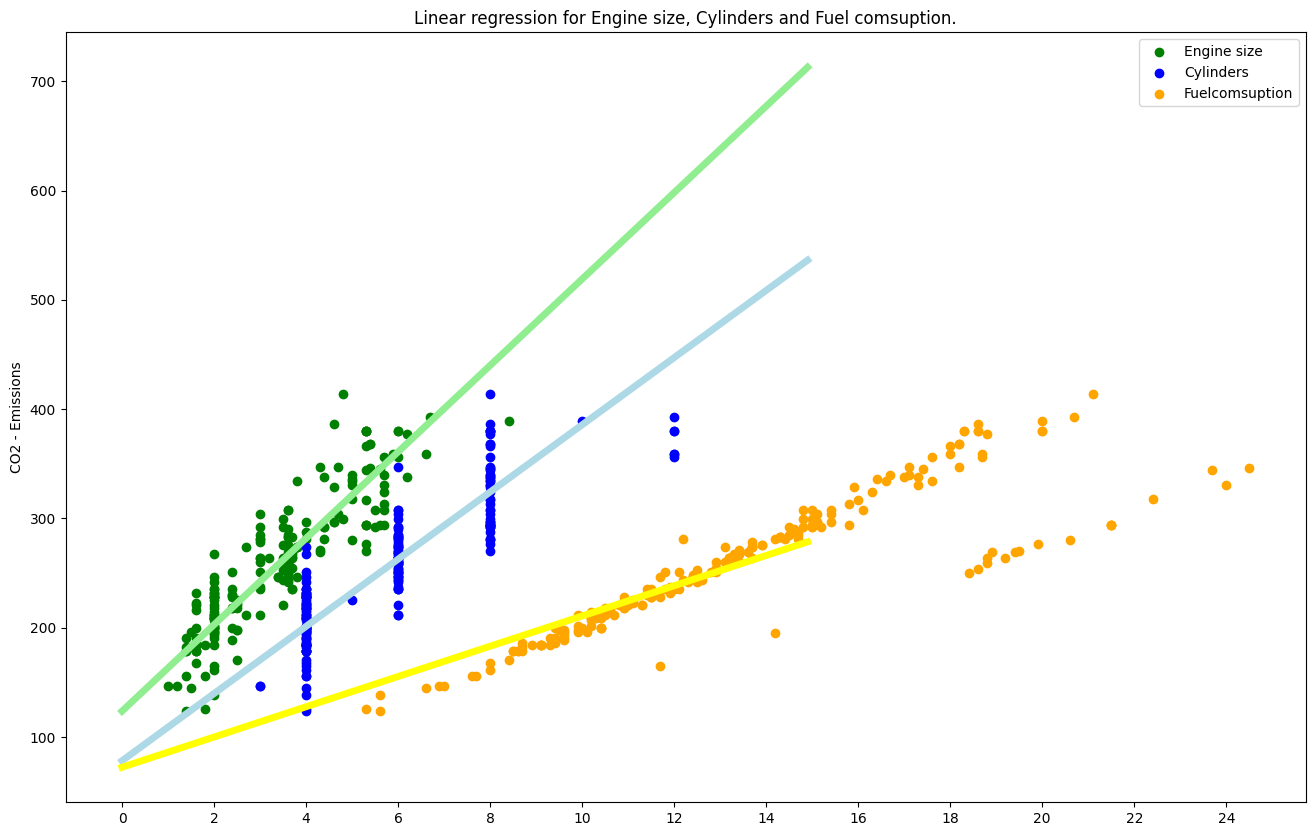

In [32]:
plt.figure(figsize=(16,10))
plt.title("Linear regression for Engine size, Cylinders and Fuel comsuption.")
plt.ylabel("CO2 - Emissions")
plt.xticks(np.arange(0, 30, 2))
# plt.scatter(y_test, m, color='green', )
# plt.scatter(y_test, n, color='blue')
# plt.scatter(y_test, o, color='orange')
# plt.scatter(y_test, p, color='red')
plt.scatter(m, y_test, color='green')
plt.scatter(n, y_test, color='blue')
plt.scatter(o, y_test, color='orange')
# plt.scatter(p, y_test, color='red')

plt.legend(["Engine size", "Cylinders", "Fuelcomsuption"])

z = pd.DataFrame(np.arange(0, 15, 0.1))

plt.plot(z, m1.predict(z), color='lightgreen', linewidth=5)
plt.plot(z, m2.predict(z), color='lightblue', linewidth=5)
plt.plot(z, m3.predict(z), color='yellow', linewidth=5)

# plt.scatter(z, multi_regression_model.predict([j for i, j in enumerate(X_test) if i < 150]), color='red', marker="*")
# plt.scatter(20, multi_regression_model.predict(np.array([8, 8, 24]).reshape(-1, 1)), color='red', marker="*")

plt.show()

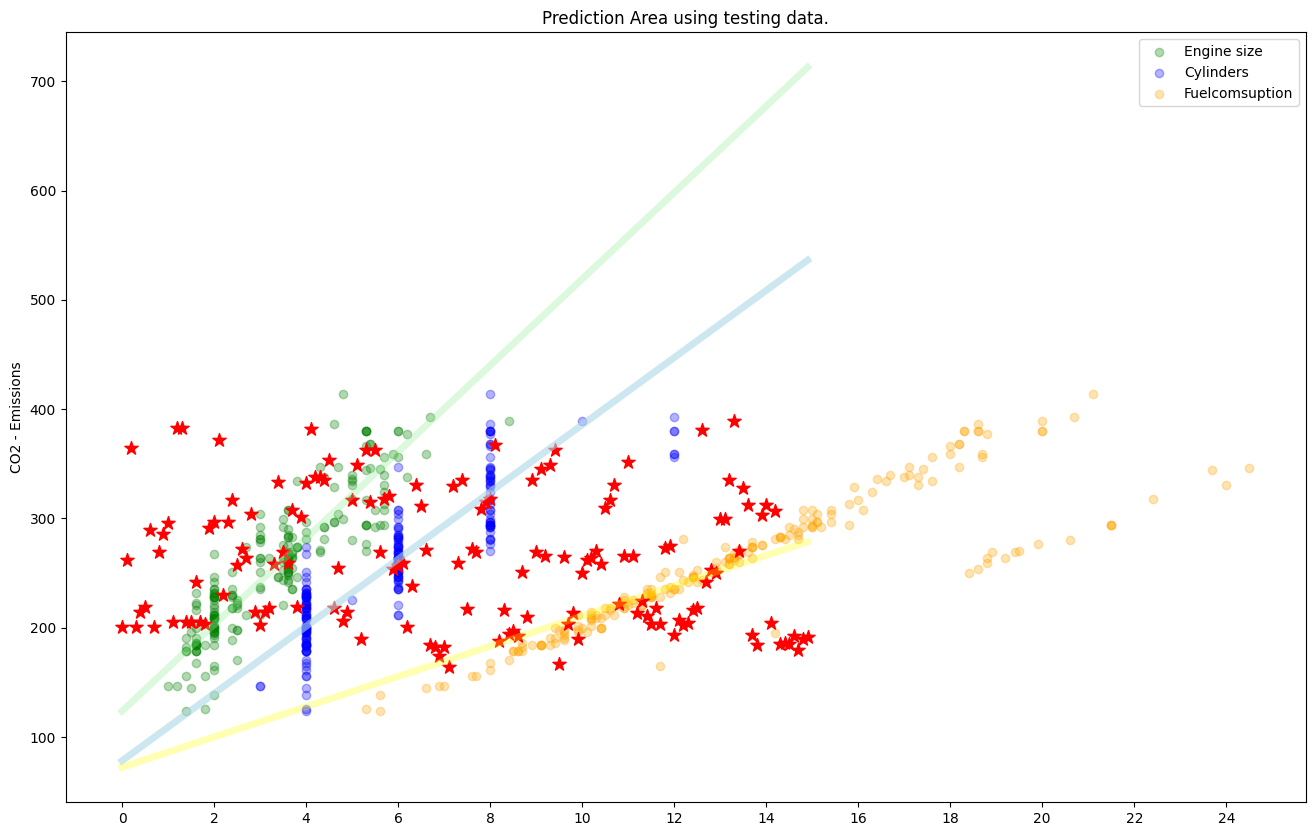

In [33]:
plt.figure(figsize=(16,10))
plt.title("Prediction Area using testing data.")
plt.ylabel("CO2 - Emissions")
plt.xticks(np.arange(0, 30, 2))
# plt.scatter(y_test, m, color='green', )
# plt.scatter(y_test, n, color='blue')
# plt.scatter(y_test, o, color='orange')
# plt.scatter(y_test, p, color='red')
plt.scatter(m, y_test, color='green', alpha=0.3)
plt.scatter(n, y_test, color='blue', alpha=0.3)
plt.scatter(o, y_test, color='orange', alpha=0.3)
# plt.scatter(p, y_test, color='red')

plt.legend(["Engine size", "Cylinders", "Fuelcomsuption"])

z = pd.DataFrame(np.arange(0, 15, 0.1))

plt.plot(z, m1.predict(z), color='lightgreen', linewidth=5, alpha=0.3)
plt.plot(z, m2.predict(z), color='lightblue', linewidth=5, alpha=0.6)
plt.plot(z, m3.predict(z), color='yellow', linewidth=5, alpha=0.3)

plt.scatter(z, multi_regression_model.predict([j for i, j in enumerate(X_test) if i < 150]), color='red', marker="*", s=100)
# plt.scatter(20, multi_regression_model.predict(np.array([8, 8, 24]).reshape(-1, 1)), color='red', marker="*")

plt.show()

In [37]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
def plot_func(engine, cylinder, fuel_consumption):
    plt.title("Interactive Prediction")
    plt.xlabel("Prediction: " + np.array2string((multi_regression_model.predict(np.array([engine, cylinder, fuel_consumption]).reshape(-1, 3)))[0]) + "CO2 Emission.")
    plt.ylabel("CO2 - Emissions")
    plt.xticks(np.arange(0, 30, 2))
    # plt.scatter(y_test, m, color='green', )
    # plt.scatter(y_test, n, color='blue')
    # plt.scatter(y_test, o, color='orange')
    # plt.scatter(y_test, p, color='red')
    plt.scatter(m, y_test, color='green', alpha=0.3)
    plt.scatter(n, y_test, color='blue', alpha=0.3)
    plt.scatter(o, y_test, color='orange', alpha=0.3)
    # plt.scatter(p, y_test, color='red')

    plt.legend(["Engine size", "Cylinders", "Fuelcomsuption"])


    plt.plot(z, m1.predict(z), color='lightgreen', linewidth=5, alpha=0.3)
    plt.plot(z, m2.predict(z), color='lightblue', linewidth=5, alpha=0.6)
    plt.plot(z, m3.predict(z), color='yellow', linewidth=5, alpha=0.3)

    plt.scatter(np.array([20]), multi_regression_model.predict(np.array([engine, cylinder, fuel_consumption]).reshape(-1, 3)), color='red', marker="*", s=100)



interact(plot_func, 
        engine = widgets.FloatSlider(value=4,
                                                min=1,
                                                max=8.5,
                                                step=0.5), 
        cylinder = widgets.FloatSlider(value=8,
                                                min=3,
                                                max=12.0,
                                                step=0.5),
        fuel_consumption = widgets.FloatSlider(value=14,
                                                min=4.6,
                                                max=30.0,
                                                step=0.5) 
                                                )

interactive(children=(FloatSlider(value=4.0, description='engine', max=8.5, min=1.0, step=0.5), FloatSlider(va…

<function __main__.plot_func(engine, cylinder, fuel_consumption)>

# Testing area

In [24]:
[w[0] for q, w in enumerate(y_test) if q < 15]

[196, 267, 359, 202, 230, 235, 288, 212, 304, 281, 297, 209, 380, 380, 200]

In [25]:
[(i, j) for i, j in enumerate(X_test) if i < 1]

[(0, array([2. , 4. , 9.9]))]

In [26]:
multi_regression_model.predict([j for i, j in enumerate(X_test) if i < 15])

array([[200.74422914],
       [262.38957556],
       [364.49563466],
       [200.74422914],
       [214.54125398],
       [218.85282424],
       [289.63820887],
       [200.74422914],
       [269.33601247],
       [285.3266386 ],
       [295.67440723],
       [205.05579941],
       [382.84375885],
       [382.84375885],
       [205.05579941]])